In [ ]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style("whitegrid")
sns.set_context("poster")
 
%matplotlib inline

In [ ]:
## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



In [ ]:
## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [ ]:
## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [ ]:
### Load the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data", names=col_names)
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [ ]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [ ]:
df["class"].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

In [ ]:
### Split the features and the target column.
x = df.drop('class', axis=1)
y = df['class']

print("Size of x (predictors): {}\nSize of y (target): {}".format(x.shape, y.shape))

Size of x (predictors): (148, 18)
Size of y (target): (148,)


In [ ]:
### Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    x_train.shape, x_test.shape, y_train.shape, y_test.shape))

#print(y_train.value_counts(), '\n', y_test.value_counts())

Size of x_train: (103, 18) 	 Size of x_test: (45, 18) 
Size of y_train: (103,) 	 Size of y_test: (45,)


In [ ]:
df_train = pd.concat([x_train, y_train], axis=1)
print("DF Train shape:", df_train.shape, "\nDF Train value counts:\n",df_train['class'].value_counts())
df_train.head()

DF Train shape: (103, 19) 
DF Train value counts:
 2    53
3    47
4     2
1     1
Name: class, dtype: int64


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
45,2,1,1,1,1,1,1,2,1,2,2,2,2,8,2,2,2,1,3
56,2,1,1,1,1,1,1,2,1,3,2,4,2,8,3,2,2,4,3
39,2,1,1,1,1,1,1,2,1,2,2,2,1,7,1,2,2,2,3
36,3,1,1,1,2,2,2,1,3,1,1,4,2,5,3,1,2,4,4
119,4,2,1,1,2,2,1,2,1,3,3,4,2,5,3,2,2,3,3


In [ ]:
### Append the class with highest value counts
df_train_up = df_train[df_train["class"]==2]

### Upsample minority classes
for n in [1, 3, 4]:
    upsampled = resample(df_train[df_train["class"]==n],
                        replace=True, # sample with replacement
                        n_samples=53, # match number in majority class
                        random_state=1) # reproducible results
    df_train_up = pd.concat([df_train_up, upsampled]) 

### Print upsampled training set to check
print("Size of df_train_up:", df_train_up.shape, "\nValue counts for class:\n", df_train_up["class"].value_counts())
df_train_up.head()

Size of df_train_up: (212, 19) 
Value counts for class:
 4    53
3    53
2    53
1    53
Name: class, dtype: int64


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
144,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1,2
124,4,2,1,1,1,2,1,1,1,2,2,3,3,5,2,1,2,1,2
123,3,1,1,1,1,1,1,1,1,2,3,3,3,4,3,1,2,2,2
120,2,1,1,1,1,1,1,1,1,1,2,4,3,8,2,2,2,2,2
93,2,1,1,1,1,1,1,1,1,1,2,2,3,3,1,2,2,1,2


In [ ]:
x_train_up = df_train_up.drop(["class"], axis=1)
y_train_up = df_train_up["class"]

print("Size of x_train_up: {}\nSize of y_train_up: {}".format(x_train_up.shape, y_train_up.shape))

Size of x_train_up: (212, 18)
Size of y_train_up: (212,)


In [ ]:
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

In [ ]:
### Finding the best k

best_k = {"Regular":0, "Upsampled":0}
best_score = {"Regular":0, "Upsampled":0}

for k in range(3, 50, 2):
    
    ## Using Regular / Not upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train, y_train)                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Regular"] and score < 100:          # Store best params
        best_score["Regular"] = score
        best_k["Regular"] = k
        
    ## Using Upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train_up, y_train_up)                        # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Upsampled"] and score < 100:        # Store best params
        best_score["Upsampled"] = score
        best_k["Upsampled"] = k
        
### Print the best score and best k
print("---Best results---\nK: {}\nScore: {}".format(best_k, best_score))

---Best results---
K: {'Regular': 5, 'Upsampled': 29}
Score: {'Regular': 71.11111111111111, 'Upsampled': 77.77777777777779}


In [ ]:
### Build final models using the best k

## Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn_up = KNeighborsClassifier(n_neighbors=best_k["Upsampled"])

## Fit the model to the training set
knn.fit(x_train, y_train)
knn_up.fit(x_train_up, y_train_up)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [ ]:
### Predict on the test set
knn_pred = knn.predict(x_test)
knn_pred_up = knn_up.predict(x_test)

In [ ]:
### Get performance metrics
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100
knn_score_up = metrics.accuracy_score(y_test, knn_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(knn, metrics.classification_report(y_test, knn_pred)))
print("Accuracy score:", knn_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(knn_up, metrics.classification_report(y_test, knn_pred_up)))
print("Accuracy score:", knn_score_up)

----- Regular Training Set Used -----
Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.82      0.81        28
           3       0.56      0.64      0.60        14
           4       0.00      0.00      0.00         2

    accuracy                           0.71        45
   macro avg       0.34      0.37      0.35        45
weighted avg       0.67      0.71      0.69        45

Accuracy score: 71.11111111111111

----- Upsampled Training Set Used -----
Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform'):
              precision

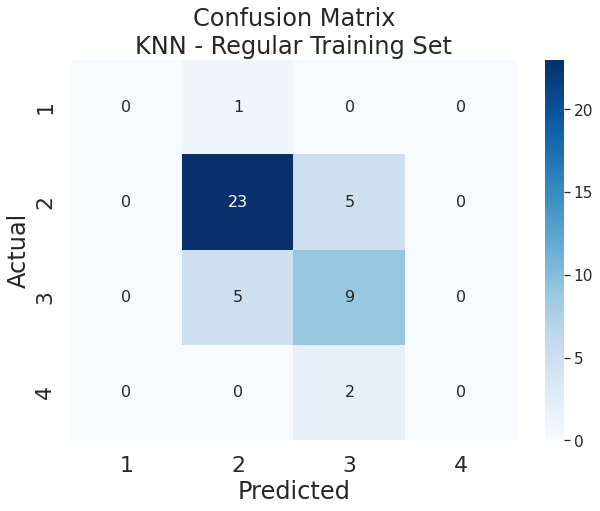

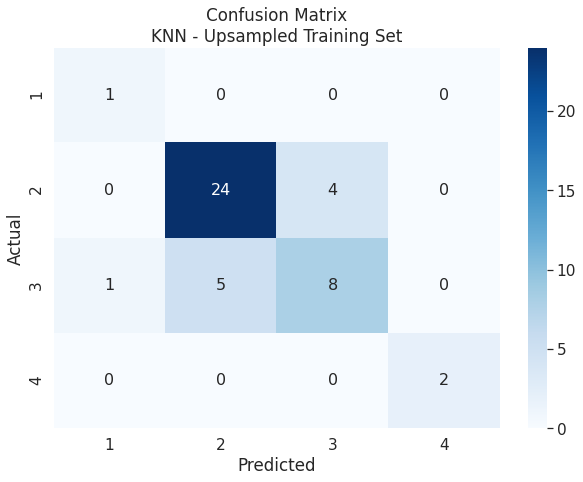

In [ ]:
### Plot confusion matrix
confmatrix(knn_pred, "Confusion Matrix\nKNN - Regular Training Set")
confmatrix(knn_pred_up, "Confusion Matrix\nKNN - Upsampled Training Set")

In [ ]:
### Perform cross-validation then get the mean
knn_cv = np.mean(cross_val_score(knn, x, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", knn_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.71428571428571


In [ ]:
### Instantiate the model
dtree = tree.DecisionTreeClassifier()
dtree_up = tree.DecisionTreeClassifier()

### Fit the model to the training set
dtree.fit(x_train, y_train)
dtree_up.fit(x_train_up, y_train_up)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
### Predict on the test set
dtree_pred = dtree.predict(x_test)
dtree_pred_up = dtree_up.predict(x_test)

In [ ]:
### Get performance metrics
dtree_score = metrics.accuracy_score(y_test, dtree_pred) * 100
dtree_score_up = metrics.accuracy_score(y_test, dtree_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(dtree, metrics.classification_report(y_test, dtree_pred)))
print("Accuracy score:", dtree_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(dtree_up, metrics.classification_report(y_test, dtree_pred_up)))
print("Accuracy score:", dtree_score_up)

----- Regular Training Set Used -----
Classification report for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.77      0.71      0.74        28
           3       0.50      0.64      0.56        14
           4       0.00      0.00      0.00         2

    accuracy                           0.64        45
   macro avg       0.32      0.34      0.33        45
weighted avg       0.63      0.64      0.64        45

Accuracy score: 64.44444444444444

----- Upsampled Training Set Used ----

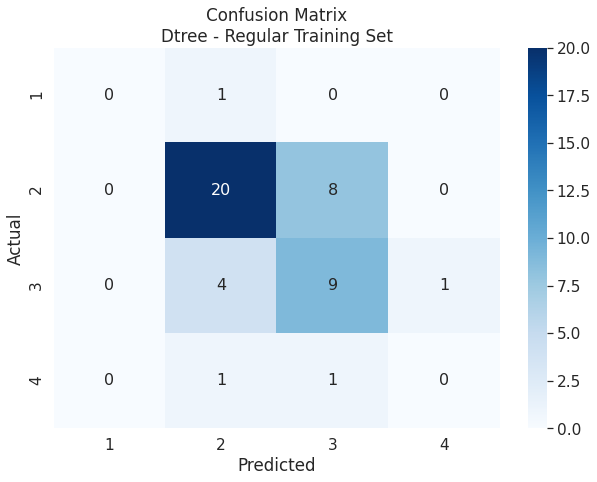

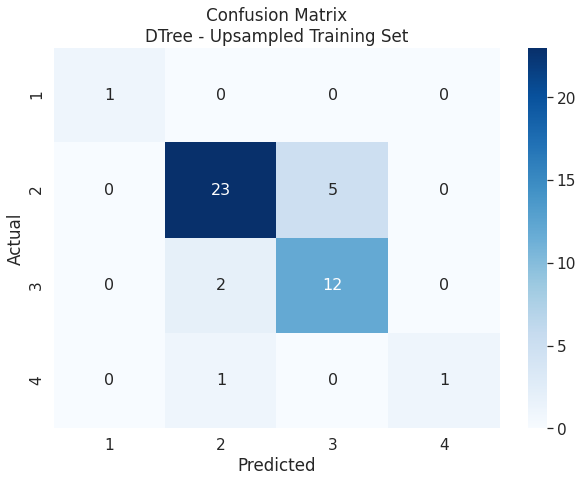

In [ ]:
### Plot confusion matrix
confmatrix(dtree_pred, "Confusion Matrix\nDtree - Regular Training Set")
confmatrix(dtree_pred_up, "Confusion Matrix\nDTree - Upsampled Training Set")

In [ ]:
### Perform cross-validation then get the mean
dtree_cv = np.mean(cross_val_score(dtree, x, y, cv=10) * 100)
print("Cross-Validation score for DTree (10 folds):", knn_cv)

Cross-Validation score for DTree (10 folds): 75.71428571428571


In [ ]:
### Extract Feature importance
### Then put into a DataFrame along with Feature Names for easier understanding.
df_feature_importance = pd.DataFrame(dtree.feature_importances_, index=x_train.columns, 
                                     columns=["Regular-Importance"])
df_feature_importance_up = pd.DataFrame(dtree_up.feature_importances_, index=x_train_up.columns, 
                                        columns=["Upsampled-Importance"])

### Merge the regular and upsampled feature importance
df_feature_importance_merged = pd.concat([df_feature_importance, df_feature_importance_up], axis=1)

### Print
print("Feature Importance - Complete")
df_feature_importance_merged.sort_values(["Regular-Importance"],ascending=False)

Feature Importance - Complete


,Regular-Importance,Upsampled-Importance
special forms,0.215058,0.013045
lym.nodes enlar,0.205810,0.051908
block of affere,0.174549,0.056109
changes in lym.,0.082975,0.000000
extravasates,0.068057,0.009704
changes in node,0.057694,0.010063
changes in stru,0.051103,0.003250
defect in node,0.050567,0.007471
early uptake in,0.034041,0.036235
exclusion of no,0.024585,0.016771


In [ ]:
# Get top features for each model
df_top_features_reg = df_feature_importance.sort_values(["Regular-Importance"],ascending=False).reset_index(level=0).rename(columns={'index':'Regular-Feature'})
df_top_features_up = df_feature_importance_up.sort_values(["Upsampled-Importance"],ascending=False).reset_index(level=0).rename(columns={'index':'Upsampled-Feature'})

## Merge the top features
df_top_features = pd.concat([df_top_features_reg, df_top_features_up], axis=1)

## Print results
print("Ranked Feature Importance")
df_top_features

Ranked Feature Importance


,Regular-Feature,Regular-Importance,Upsampled-Feature,Upsampled-Importance
0,special forms,0.215058,lymphatics,0.342155
1,lym.nodes enlar,0.205810,lym.nodes dimin,0.333333
2,block of affere,0.174549,no. of nodes in,0.107759
3,changes in lym.,0.082975,block of affere,0.056109
4,extravasates,0.068057,lym.nodes enlar,0.051908
5,changes in node,0.057694,early uptake in,0.036235
6,changes in stru,0.051103,exclusion of no,0.016771
7,defect in node,0.050567,special forms,0.013045
8,early uptake in,0.034041,by pass,0.012197
9,exclusion of no,0.024585,changes in node,0.010063


In [ ]:
## To visualize decision tree ##
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Decision Tree Plot - Regular Training Set Used
Depth: 8 	 N-Leaves: 20


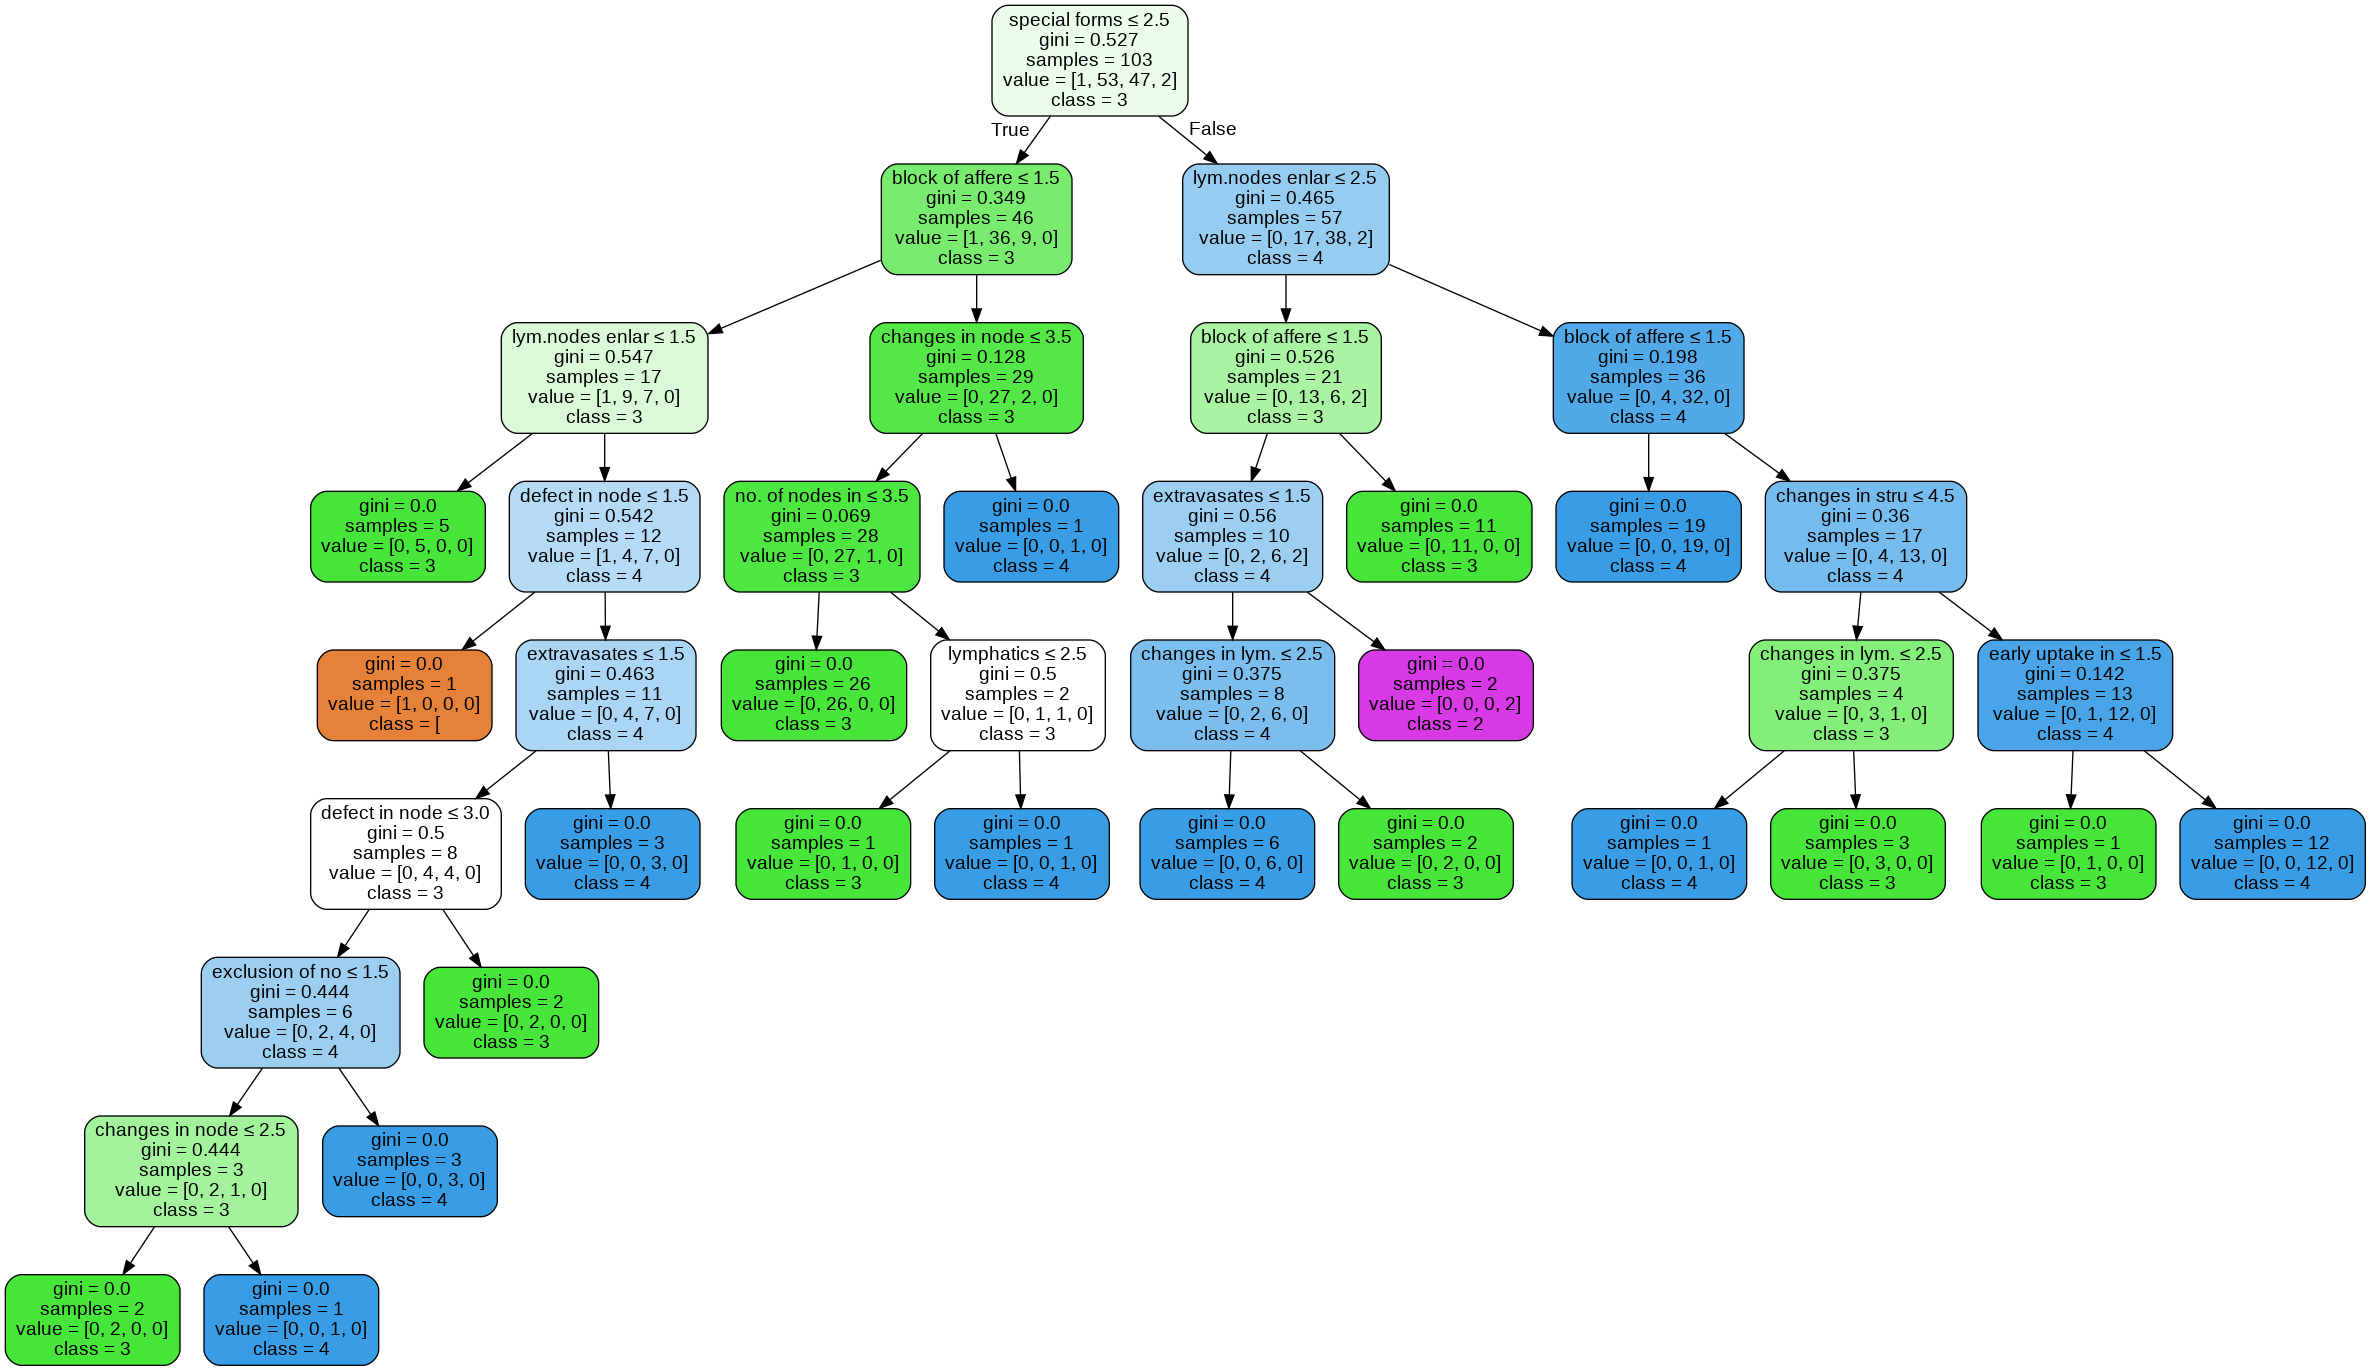

In [ ]:
### Visualize Dtree model that used regular training set

print("Decision Tree Plot - Regular Training Set Used")
print("Depth: {} \t N-Leaves: {}".format(dtree.get_depth(), dtree.get_n_leaves()))

## Get the feature/attribute columns
feature_col = x_train.columns

## Get the class column
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")

## Plot tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_col, class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Plot - Upsampled Training Set Used
Depth: 9 	 N-Leaves: 17


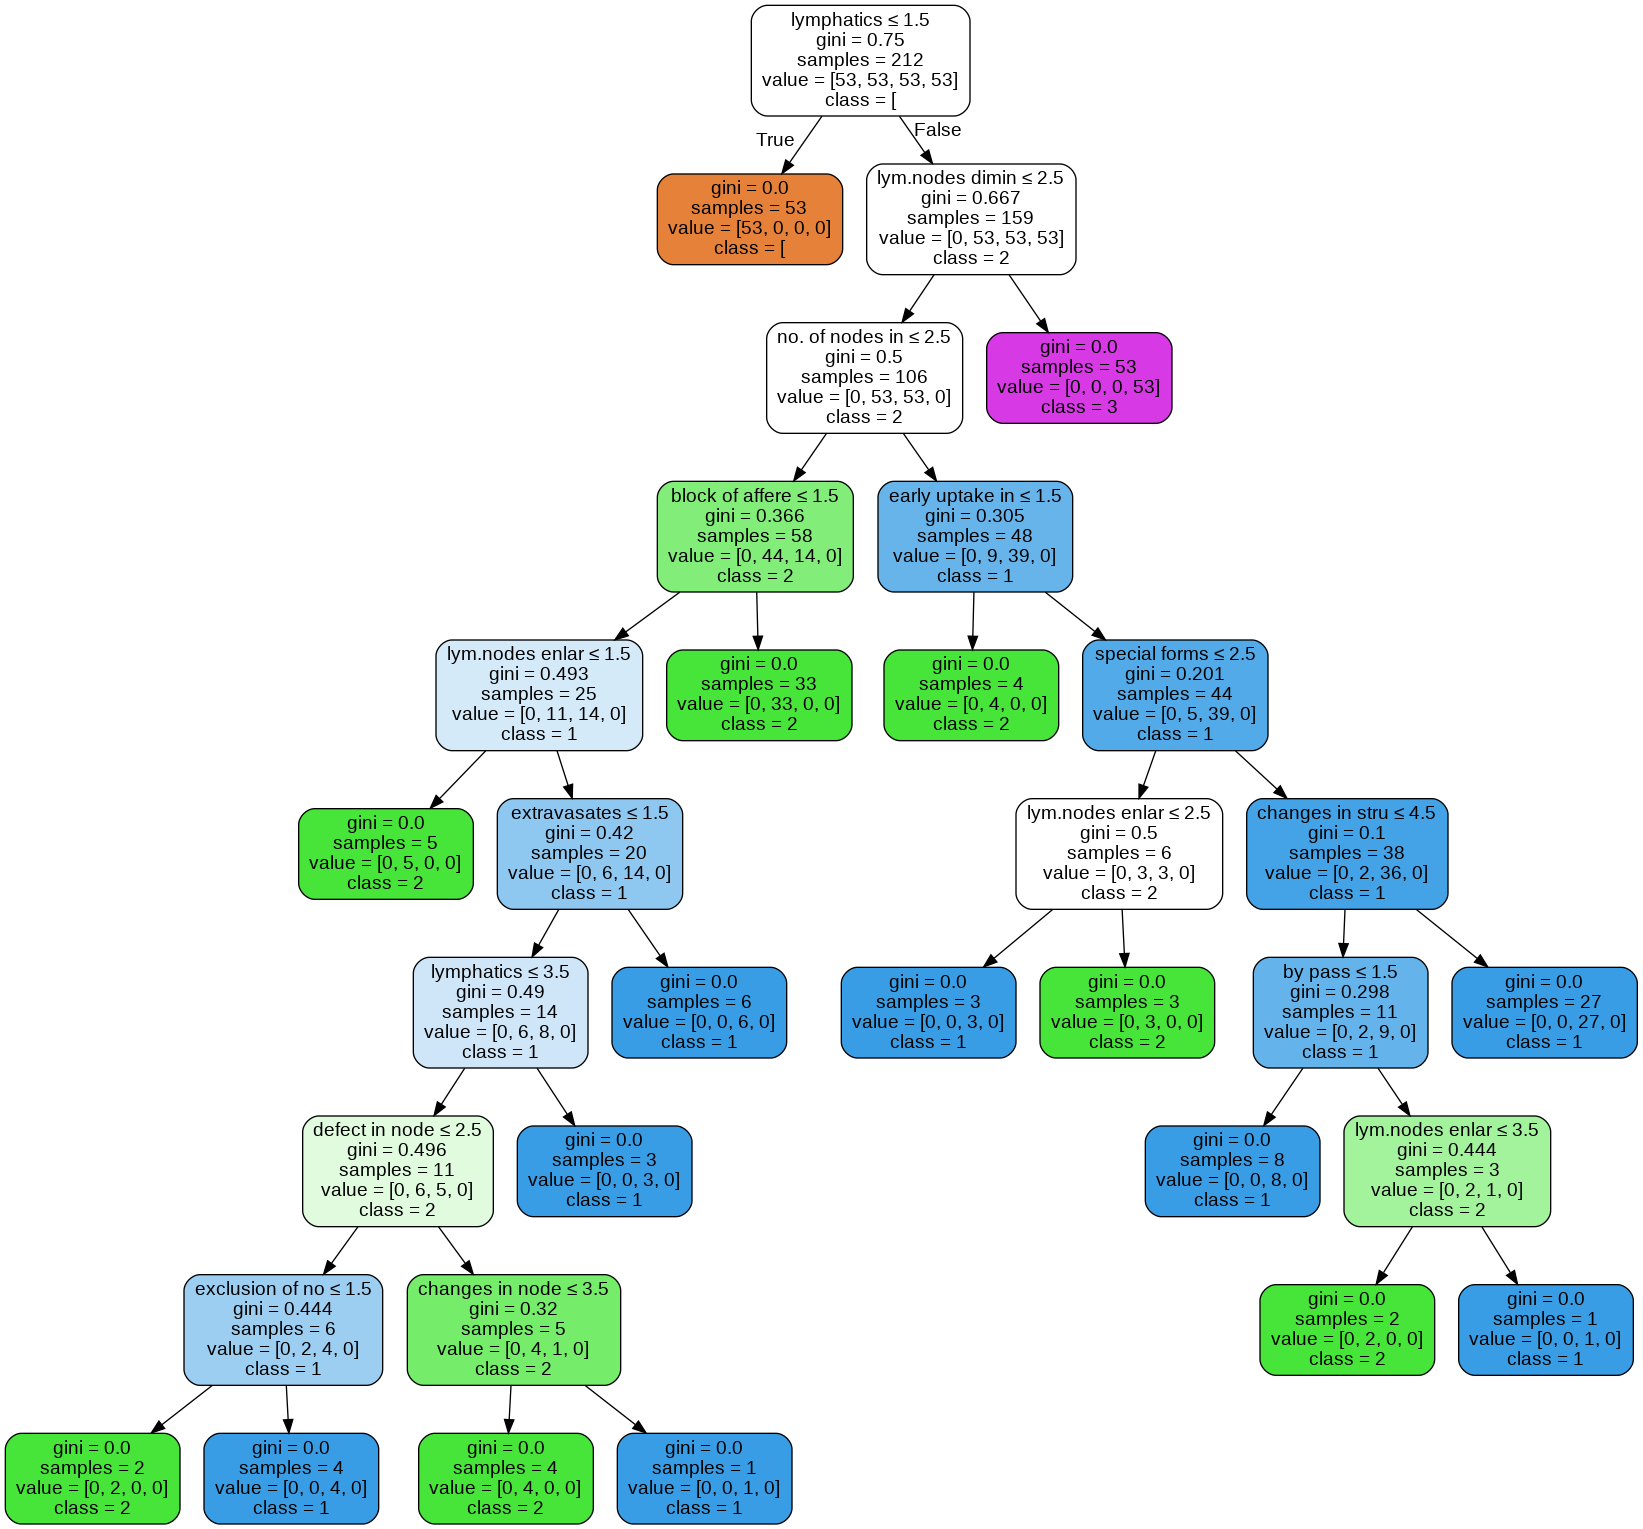

In [ ]:
### Visualize Dtree model that used upsampled training set

print("Decision Tree Plot - Upsampled Training Set Used")
print("Depth: {} \t N-Leaves: {}".format(dtree_up.get_depth(), dtree_up.get_n_leaves()))

## Get the feature/attribute columns
feature_col = x_train_up.columns

## Get the class column
class_col = pd.unique(y_train_up)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")

## Plot tree
dot_data = StringIO()
export_graphviz(dtree_up, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_col, class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
### Instantiate algorithm
rf = RandomForestClassifier()
rf_up = RandomForestClassifier()

### Fit the model to the data
rf.fit(x_train, y_train)
rf_up.fit(x_train_up, y_train_up)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
### Predict on the test set
rf_pred = rf.predict(x_test)
rf_pred_up = rf_up.predict(x_test)

In [ ]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100
rf_score_up = metrics.accuracy_score(y_test, rf_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", dtree_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(rf_up, metrics.classification_report(y_test, rf_pred_up)))
print("Accuracy score:", rf_score_up)

----- Regular Training Set Used -----
Classification report for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.83      0.86      0.84        28
           3       0.69      0.79      0.73        14
           4       0.00      0.00      0.00         2

    accuracy                           0.78        45
   macro avg       0.38      0.41      0.39        45
weighted

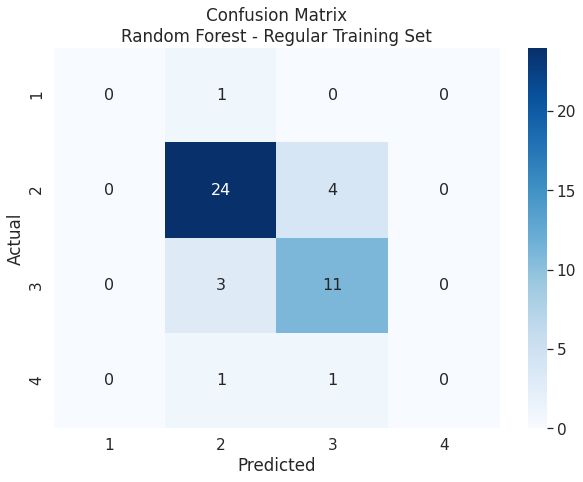

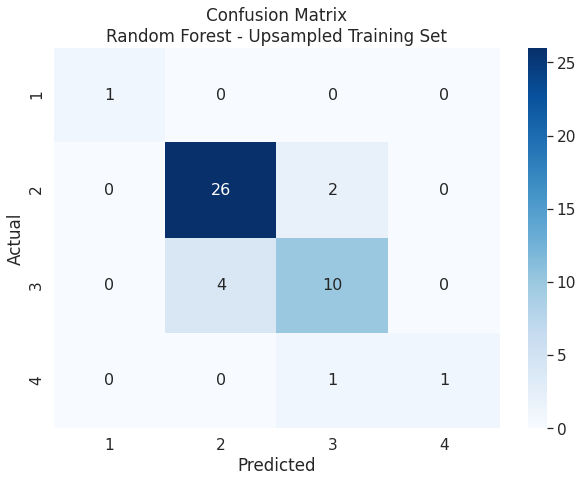

In [ ]:
### Plot confusion matrix
confmatrix(rf_pred, "Confusion Matrix\nRandom Forest - Regular Training Set")
confmatrix(rf_pred_up, "Confusion Matrix\nRandom Forest - Upsampled Training Set")

In [ ]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, x, y, cv=10) * 100)
print("Cross-Validation score for RandomForest (10 folds):", rf_cv)

Cross-Validation score for RandomForest (10 folds): 85.09523809523809


In [ ]:
df_results = pd.DataFrame.from_dict({
    'Regular - Accuracy Score':{'KNN':knn_score, 'Decision Tree':dtree_score, 'Random Forest':rf_score},
    'Upsampled - Accuracy Score':{'KNN':knn_score_up, 'Decision Tree':dtree_score_up, 'Random Forest':rf_score_up},
    'Cross-Validation Score':{'KNN':knn_cv, 'Decision Tree':dtree_cv, 'Random Forest':rf_cv}
    })
df_results

,Regular - Accuracy Score,Upsampled - Accuracy Score,Cross-Validation Score
KNN,71.111111,77.777778,75.714286
Decision Tree,64.444444,82.222222,77.714286
Random Forest,77.777778,84.444444,85.095238
